In [ ]:
%pip install matplotlib

In [1]:
import matplotlib
import matplotlib.pyplot as plt

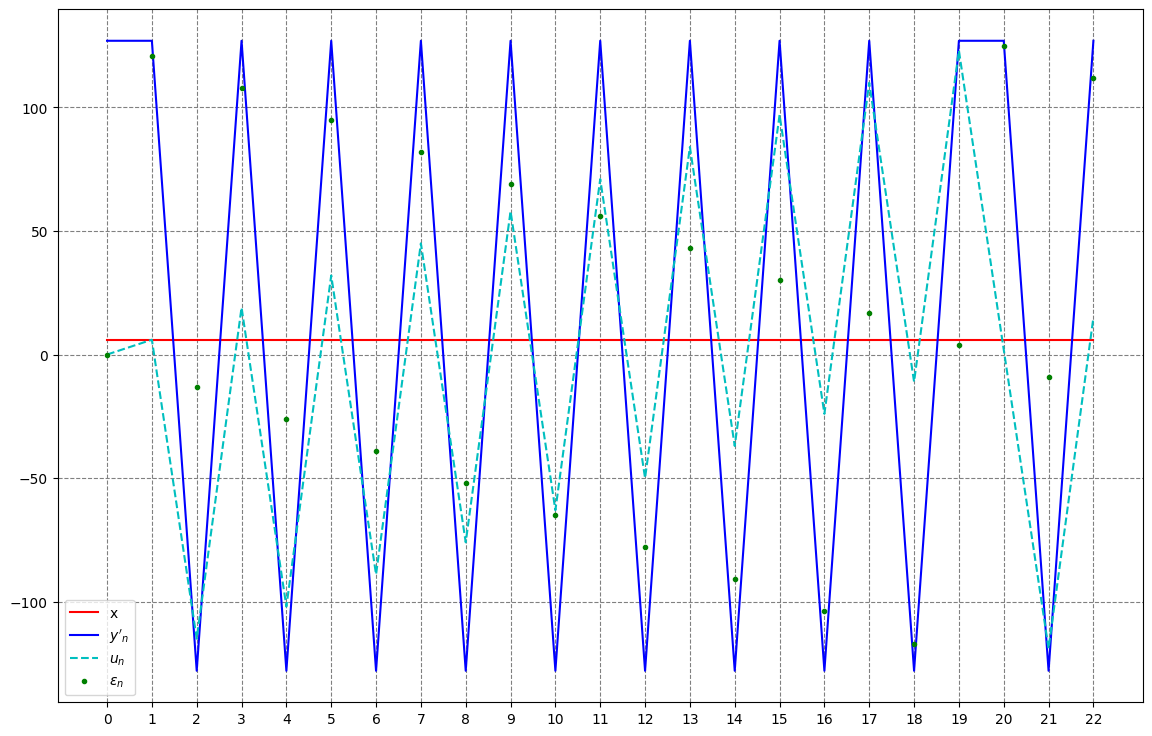

In [20]:
length = 23
counts = [x for x in range(length)]
x_n = [6]*length
y_n = [0]*length
eps_n = [0]*length
u_n = [0]*length

y_n[0] = 127
eps_n[0] = 0
u_n[0] = 0
for x in range(1, length):
    u_n[x] = x_n[x - 1] - eps_n[x - 1]
    y_n[x] = 127 if u_n[x] >= 0 else -128
    eps_n[x] = y_n[x] - u_n[x]
#    print('$x = ' + str(x_n[x]) + ', u_{' + str(x) + '} = ' + str(u_n[x]) + ', y_{' + str(x-1) + '} = ' + str(y_n[x-1]) + ', \\varepsilon_{' + str(x) + '} = ' + str(eps_n[x]) + '$')


fig, ax = plt.subplots()

ax.plot(counts, x_n, 'r-', label='x')
ax.plot(counts, y_n, 'b-', label='$y\'_n$')
ax.plot(counts, u_n, 'c--', label='$u_n$')
ax.plot(counts, eps_n, 'g.', label='$\\varepsilon_n$')
ax.legend()
ax.grid(linestyle='--', color='grey')
fig.set_figheight(9)
fig.set_figwidth(14)
plt.xticks(counts)
#plt.show()
plt.savefig('03-fpga-04-sigdel.pgf', format='pgf')

In [15]:
def moreless(in1, in2):
    out = []
    if (in1 >= in2):
        out.append(in1)
        out.append(in2)
    else:
        out.append(in2)
        out.append(in1)
    return out


In [17]:
def layer4(in8):
    out = [0 for x in range(8)]
    tmp = [0 for x in range(2)]
    for i in range(4):
        tmp = moreless(in8[i * 2], in8[i * 2 + 1])
        out[i * 2] = tmp[0]
        out[i * 2 + 1] = tmp[1]
    
    return out

In [18]:
def layer3(in8):
    out = [0 for x in range(8)]
    tmp = [0 for x in range(2)]
    out[0] = in8[0]
    out[7] = in8[7]
    for i in range(3):
        tmp = moreless(in8[i * 2 + 1], in8[i * 2 + 2])
        out[i * 2 + 1] = tmp[0]
        out[i * 2 + 2] = tmp[1]
    
    return out

In [19]:
arr = [0, 1, 2, 3, 4, 5, 6, 7]
step = []
print(arr)
step = layer4(arr)
print(step)
step = layer3(step)
print(step)
step = layer4(step)
print(step)
step = layer3(step)
print(step)
step = layer4(step)
print(step)
step = layer3(step)
print(step)
step = layer4(step)
print(step)
step = layer3(step)
print(step)


[0, 1, 2, 3, 4, 5, 6, 7]
[1, 0, 3, 2, 5, 4, 7, 6]
[1, 3, 0, 5, 2, 7, 4, 6]
[3, 1, 5, 0, 7, 2, 6, 4]
[3, 5, 1, 7, 0, 6, 2, 4]
[5, 3, 7, 1, 6, 0, 4, 2]
[5, 7, 3, 6, 1, 4, 0, 2]
[7, 5, 6, 3, 4, 1, 2, 0]
[7, 6, 5, 4, 3, 2, 1, 0]
